In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader, random_split

# MLP Model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(MLP, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, hidden_sizes[0]),
            nn.ReLU(),
            nn.Linear(hidden_sizes[0], hidden_sizes[1]),
            nn.ReLU(),
            nn.Linear(hidden_sizes[1], output_size),
            nn.Softmax(dim=1)
        )
    
    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the images for MLP
        return self.network(x)
    
dataset = FashionMNIST(root='.', train=True, transform=transforms.ToTensor(), download=True)    
input_size = 28*28
input_channels = 1

hidden_sizes = [512, 256]  # Larger network for CIFAR10
output_size = 10

train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Model, Loss, and Optimizer

model = MLP(input_size, hidden_sizes, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training and Validation Loop
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0
    for images, labels in train_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()

    model.eval()
    total_val_loss = 0
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_val_loss += loss.item()

    print(f'Epoch {epoch+1}, Training Loss: {total_train_loss/len(train_loader)}, Validation Loss: {total_val_loss/len(val_loader)}')

C:\Users\14698\anaconda3\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


100%|█████████████████████████████████████████████████████████████████| 26421880/26421880 [00:12<00:00, 2062823.35it/s]


Extracting .\FashionMNIST\raw\train-images-idx3-ubyte.gz to .\FashionMNIST\raw



100%|████████████████████████████████████████████████████████████████████████| 29515/29515 [00:00<00:00, 242638.01it/s]


Extracting .\FashionMNIST\raw\train-labels-idx1-ubyte.gz to .\FashionMNIST\raw



100%|███████████████████████████████████████████████████████████████████| 4422102/4422102 [00:01<00:00, 2525358.59it/s]


Extracting .\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to .\FashionMNIST\raw



100%|██████████████████████████████████████████████████████████████████████████████████████| 5148/5148 [00:00<?, ?it/s]


Extracting .\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to .\FashionMNIST\raw

Epoch 1, Training Loss: 1.7874745872772135, Validation Loss: 1.70139630931489
Epoch 2, Training Loss: 1.6911282987108727, Validation Loss: 1.7045117071334352
Epoch 3, Training Loss: 1.688033861500957, Validation Loss: 1.6725812053426783
Epoch 4, Training Loss: 1.683484986777554, Validation Loss: 1.7046662099817966
Epoch 5, Training Loss: 1.6841847290642453, Validation Loss: 1.6895417647158846
Epoch 6, Training Loss: 1.6805240393956125, Validation Loss: 1.6735090137796198
Epoch 7, Training Loss: 1.6790003438978964, Validation Loss: 1.6920370973171073
Epoch 8, Training Loss: 1.6532455798573968, Validation Loss: 1.6383264476948596
Epoch 9, Training Loss: 1.636085854393046, Validation Loss: 1.6292833730261376
Epoch 10, Training Loss: 1.6378681491619038, Validation Loss: 1.6191871946162366
Epoch 11, Training Loss: 1.6227525801737726, Validation Loss: 1.6155383732724697
Epoch 12, Training Loss: 1.6330919559532997,

100%|██████████████████████████████████████████████████████████████| 170498071/170498071 [00:07<00:00, 23109649.80it/s]


Extracting .\cifar-10-python.tar.gz to .


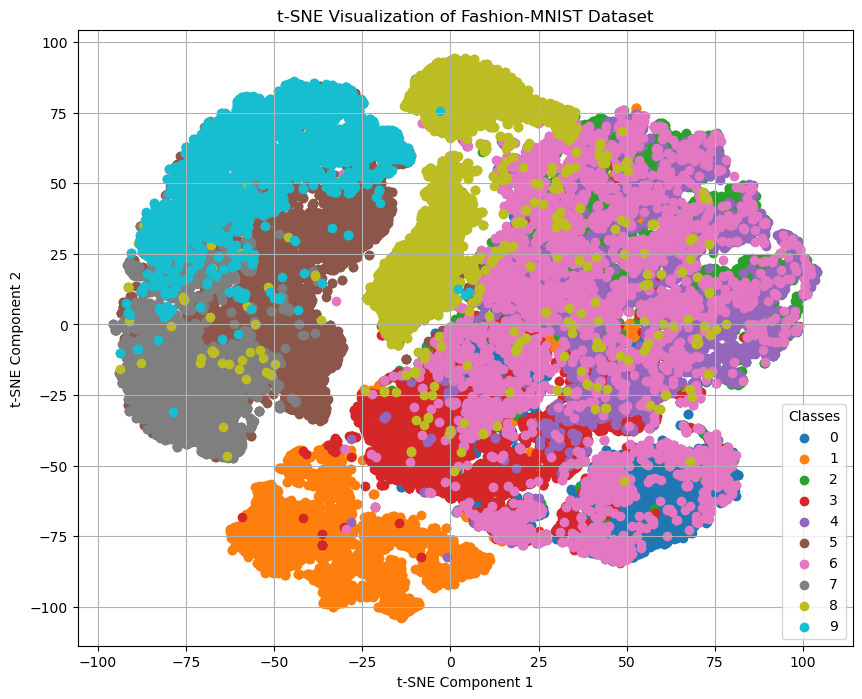

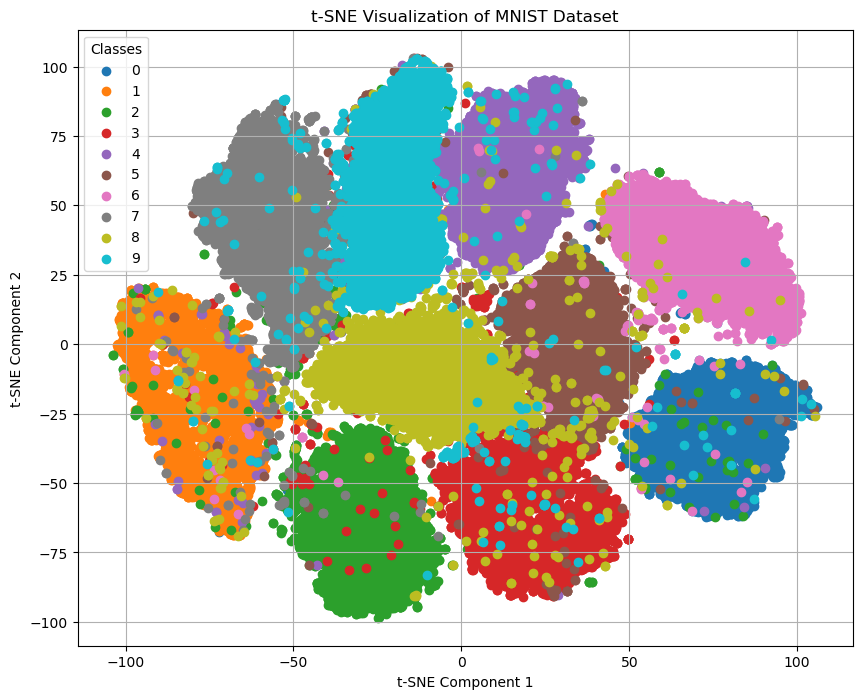

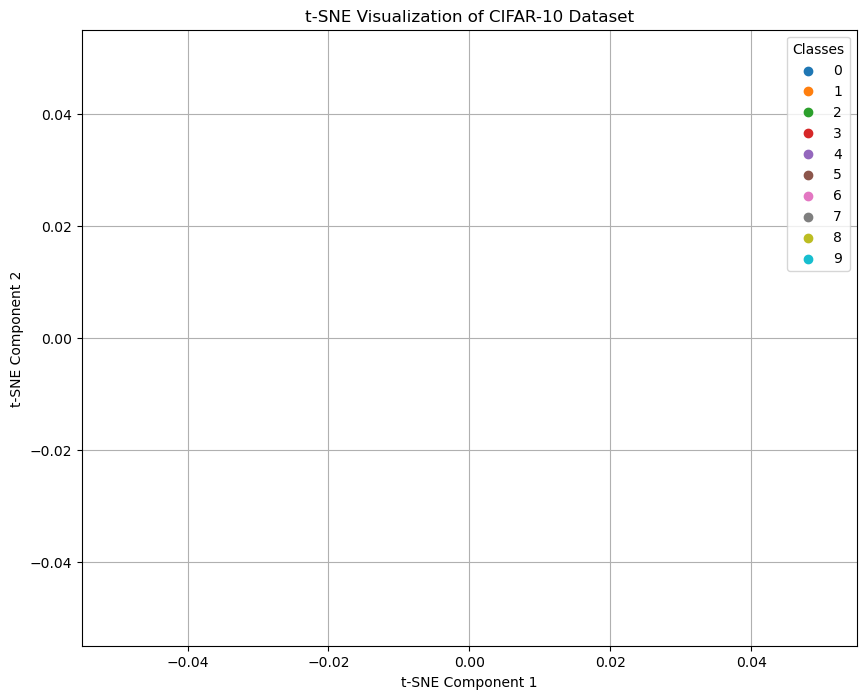

In [2]:
import torch
from torchvision.datasets import FashionMNIST
from torchvision.datasets import MNIST
from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# transform function for CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load the datasets
fashion_mnist_train = FashionMNIST(root='.', train=True, transform=transforms.ToTensor(), download=True)
mnist_train = MNIST(root='.', train=True, transform=transforms.ToTensor(), download=True)
cifar10_train = CIFAR10(root='.', train=True, transform=transform, download=True)

def perform_tsne(dataset, name, input_size, isCIFAR):
    if isCIFAR:
        images = dataset.data.reshape((-1, input_size*input_size*3)).astype(float)
    else:
        # Extract images and labels
        images = dataset.data.reshape((-1, input_size*input_size))
    
    labels = dataset.targets

    # Reduce dimensionality with t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(images)

    # Visualize the t-SNE results
    plt.figure(figsize=(10, 8))
    for i in range(10):  # Plot each digit class separately
        indices = labels == i
        plt.scatter(tsne_results[indices, 0], tsne_results[indices, 1], label=str(i))
    plt.title('t-SNE Visualization of ' + name + ' Dataset')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.legend(title='Classes')
    plt.grid(True)
    plt.show()

perform_tsne(fashion_mnist_train, "Fashion-MNIST", 28, False)
perform_tsne(mnist_train, "MNIST", 28, False)
perform_tsne(cifar10_train, "CIFAR-10", 32, True)


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader, random_split

class LeNet(nn.Module):
    def __init__(self, input_channels=1):
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5, padding=2),  # Use padding=2 to keep dimension 28x28
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2),  # Output size: 14x14
            nn.Conv2d(6, 16, kernel_size=5, padding=0),  # Output size: 10x10 (no padding)
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2)  # Output size: 5x5
        )
        self.fc_model = nn.Sequential(
            nn.Linear(16 * 5 * 5, 120),
            nn.ReLU(),
            nn.Linear(120, 84),
            nn.ReLU(),
            nn.Linear(84, 10)
        )
        
    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)  # Flatten the output
        return self.fc_model(x)

dataset = FashionMNIST(root='.', train=True, transform=transforms.ToTensor(), download=True)
input_size = 28*28
input_channels = 1

hidden_sizes = [512, 256]  # Larger network for CIFAR10
output_size = 10

train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Model, Loss, and Optimizer
model = LeNet(input_channels)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training and Validation Loop
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0
    for images, labels in train_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()

    model.eval()
    total_val_loss = 0
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_val_loss += loss.item()

    print(f'Epoch {epoch+1}, Training Loss: {total_train_loss/len(train_loader)}, Validation Loss: {total_val_loss/len(val_loader)}')
    

Epoch 1, Training Loss: 0.6391652186546846, Validation Loss: 0.42657293288156073
Epoch 2, Training Loss: 0.4020319073968589, Validation Loss: 0.3541329864491808
Epoch 3, Training Loss: 0.3361753950676753, Validation Loss: 0.33021078341977395
Epoch 4, Training Loss: 0.3013271207190715, Validation Loss: 0.27590811488396944
Epoch 5, Training Loss: 0.2764240881142326, Validation Loss: 0.2810419463413827
Epoch 6, Training Loss: 0.2579887660608684, Validation Loss: 0.27346319955912357
Epoch 7, Training Loss: 0.24340435163828575, Validation Loss: 0.2718189795442084
Epoch 8, Training Loss: 0.23113112336232092, Validation Loss: 0.27448864703244985
Epoch 9, Training Loss: 0.21628498650261893, Validation Loss: 0.2750640630008692
Epoch 10, Training Loss: 0.20907394234306217, Validation Loss: 0.2627195426203469
Epoch 11, Training Loss: 0.1965828065868573, Validation Loss: 0.2565276881858231
Epoch 12, Training Loss: 0.18575350876888747, Validation Loss: 0.2762771129132585
Epoch 13, Training Loss: 0.

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader, random_split

class FlexNet(nn.Module):
    def __init__(self, input_channels=1):
        super(FlexNet, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(input_channels, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.BatchNorm2d(64),
            nn.Conv2d(64, 128, kernel_size=3, padding=2, dilation=2),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.BatchNorm2d(128)
        )
        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 7 * 7, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 10),
            nn.LogSoftmax(dim=1)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

def train_model(dataset_class, input_channels):
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])
    dataset = dataset_class(root='.', train=True, download=True, transform=transform)
    train_size = int(0.9 * len(dataset))
    val_size = len(dataset) - train_size
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

    model = FlexNet(input_channels=input_channels)
    print(model)
    criterion = nn.NLLLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    num_epochs = 50
    for epoch in range(num_epochs):
        total_train_loss = 0
        total_val_loss = 0
        model.train()
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()

        model.eval()
        with torch.no_grad():
            for images, labels in val_loader:
                outputs = model(images)
                loss = criterion(outputs, labels)
                total_val_loss += loss.item()

        print(f'Epoch {epoch+1}: Training Loss: {total_train_loss / len(train_loader)}, Validation Loss: {total_val_loss / len(val_loader)}')

train_model(FashionMNIST, 1)

FlexNet(
  (conv_layers): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2), dilation=(2, 2))
    (7): ReLU()
    (8): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (fc_layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=6272, out_features=512, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=512, out_fe